In [1]:
# Import the dependencies.
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Set up Splinter
browser = Browser ('chrome')

The chromedriver version (120.0.6099.109) detected in PATH at C:\Windows\chromedriver.exe might not be compatible with the detected chrome version (121.0.6167.140); currently, chromedriver 121.0.6167.85 is recommended for chrome 121.*, so it is advised to delete the driver in PATH and retry


## Scrape All the Analysis Data from Finance.yahoo.com

In [3]:
# Visit the Mars Facts site
url= 'https://finance.yahoo.com/quote/DOL.TO/analysis?p=DOL.TO'
browser.visit(url)

In [4]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [5]:
# Find all tables within the specified section
DOL_tables = soup.select('section[data-test="qsp-analyst"] table')

# Initialize lists to store headers and data
data_rows = []
headers = []

# Loop through each table and print the data
for table in DOL_tables:
    
    # Iterate through rows in the table
    for row in table.find_all('tr'):
        # Extract data from cells
        columns = row.find_all(['th', 'td'])
        if columns:
            if not headers:
                # Extract headers for the first row
                headers = [col.text.strip() for col in columns]
            else:
                # Extract data for subsequent rows
                data_row = [col.text.strip() for col in columns]
                data_rows.append(data_row)

    # Print the extracted data
    print('\t'.join(headers))
    for data_row in data_rows:
        print('\t'.join(data_row))
    print('\n')



Earnings Estimate	Current Qtr. (Jan 2024)	Next Qtr. (Apr 2024)	Current Year (2024)	Next Year (2025)
No. of Analysts	8	6	9	10
Avg. Estimate	1.05	0.7	3.44	3.87
Low Estimate	1	0.69	3.36	3.79
High Estimate	1.07	0.72	3.48	4.04
Year Ago EPS	0.91	0.63	2.76	3.44


Earnings Estimate	Current Qtr. (Jan 2024)	Next Qtr. (Apr 2024)	Current Year (2024)	Next Year (2025)
No. of Analysts	8	6	9	10
Avg. Estimate	1.05	0.7	3.44	3.87
Low Estimate	1	0.69	3.36	3.79
High Estimate	1.07	0.72	3.48	4.04
Year Ago EPS	0.91	0.63	2.76	3.44
Revenue Estimate	Current Qtr. (Jan 2024)	Next Qtr. (Apr 2024)	Current Year (2024)	Next Year (2025)
No. of Analysts	3	1	10	10
Avg. Estimate	1.61B	1.38B	5.84B	6.31B
Low Estimate	1.59B	1.38B	5.8B	6.2B
High Estimate	1.62B	1.38B	5.86B	6.47B
Year Ago Sales	1.47B	N/A	5.05B	5.84B
Sales Growth (year/est)	9.00%	N/A	15.50%	8.20%


Earnings Estimate	Current Qtr. (Jan 2024)	Next Qtr. (Apr 2024)	Current Year (2024)	Next Year (2025)
No. of Analysts	8	6	9	10
Avg. Estimate	1.05	0.7	3.44	3.87
Low Esti

In [6]:
# creat a data frame table for DOL.
DOL_table_df = pd.DataFrame(data_rows)
DOL_table_df

,0,1,2,3,4
0,No. of Analysts,8,6,9,10
1,Avg. Estimate,1.05,0.7,3.44,3.87
2,Low Estimate,1,0.69,3.36,3.79
3,High Estimate,1.07,0.72,3.48,4.04
4,Year Ago EPS,0.91,0.63,2.76,3.44
5,Revenue Estimate,Current Qtr. (Jan 2024),Next Qtr. (Apr 2024),Current Year (2024),Next Year (2025)
6,No. of Analysts,3,1,10,10
7,Avg. Estimate,1.61B,1.38B,5.84B,6.31B
8,Low Estimate,1.59B,1.38B,5.8B,6.2B
9,High Estimate,1.62B,1.38B,5.86B,6.47B


In [7]:
# Rename the columns and creat an index
DOL_table_df.columns = [
    "DOL Earnings Estimate",
    "Current Qtr. (Jan 2024)",
    "Next Qtr. (Apr 2024)",
    "Current Year (2024)",
    "Next Year (2025)"
]
DOL_table_df.set_index(DOL_table_df.columns[0], inplace=True)
DOL_table_df

,Current Qtr. (Jan 2024),Next Qtr. (Apr 2024),Current Year (2024),Next Year (2025)
DOL Earnings Estimate,,,,
No. of Analysts,8,6,9,10
Avg. Estimate,1.05,0.7,3.44,3.87
Low Estimate,1,0.69,3.36,3.79
High Estimate,1.07,0.72,3.48,4.04
Year Ago EPS,0.91,0.63,2.76,3.44
Revenue Estimate,Current Qtr. (Jan 2024),Next Qtr. (Apr 2024),Current Year (2024),Next Year (2025)
No. of Analysts,3,1,10,10
Avg. Estimate,1.61B,1.38B,5.84B,6.31B
Low Estimate,1.59B,1.38B,5.8B,6.2B


In [8]:
# New URL of the finance.yahoo.com webpage
url = 'https://finance.yahoo.com/quote/CTC-A.TO/analysis?p=CTC-A.TO'
browser.visit(url)

In [9]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [10]:
# Find all tables within the specified section
CTC_tables = soup.select('section[data-test="qsp-analyst"] table')

# Initialize lists to store headers and data
data_rows = []
headers = []

# Loop through each table and print the data
for table in CTC_tables:
    
    # Iterate through rows in the table
    for row in table.find_all('tr'):
        # Extract data from cells
        columns = row.find_all(['th', 'td'])
        if columns:
            if not headers:
                # Extract headers for the first row
                headers = [col.text.strip() for col in columns]
            else:
                # Extract data for subsequent rows
                data_row = [col.text.strip() for col in columns]
                data_rows.append(data_row)

    # Print the extracted data
    print('\t'.join(headers))
    for data_row in data_rows:
        print('\t'.join(data_row))
    print('\n')

Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	7	5	10	10
Avg. Estimate	5.08	1.3	12.29	14.32
Low Estimate	4.24	0.8	11.23	13.01
High Estimate	5.79	1.71	13.18	15.57
Year Ago EPS	9.34	1	18.75	12.29


Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	7	5	10	10
Avg. Estimate	5.08	1.3	12.29	14.32
Low Estimate	4.24	0.8	11.23	13.01
High Estimate	5.79	1.71	13.18	15.57
Year Ago EPS	9.34	1	18.75	12.29
Revenue Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	5	1	9	9
Avg. Estimate	4.94B	3.63B	17.15B	17.55B
Low Estimate	4.63B	3.63B	16.84B	16.91B
High Estimate	5.2B	3.63B	17.41B	17.85B
Year Ago Sales	5.34B	3.71B	17.81B	17.15B
Sales Growth (year/est)	-7.60%	-2.10%	-3.70%	2.30%


Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	7	5	10	10
Avg. Estima

In [11]:
# creat a data frame table for CTC.
CTC_table_df = pd.DataFrame(data_rows)
CTC_table_df

,0,1,2,3,4
0,No. of Analysts,7,5,10,10
1,Avg. Estimate,5.08,1.3,12.29,14.32
2,Low Estimate,4.24,0.8,11.23,13.01
3,High Estimate,5.79,1.71,13.18,15.57
4,Year Ago EPS,9.34,1,18.75,12.29
5,Revenue Estimate,Current Qtr. (Dec 2023),Next Qtr. (Mar 2024),Current Year (2023),Next Year (2024)
6,No. of Analysts,5,1,9,9
7,Avg. Estimate,4.94B,3.63B,17.15B,17.55B
8,Low Estimate,4.63B,3.63B,16.84B,16.91B
9,High Estimate,5.2B,3.63B,17.41B,17.85B


In [12]:
# Rename the columns and creat an index
CTC_table_df.columns = [
    "CTC Earnings Estimate",
    "Current Qtr. (Jan 2024)",
    "Next Qtr. (Apr 2024)",
    "Current Year (2024)",
    "Next Year (2025)"
]
CTC_table_df.set_index(CTC_table_df.columns[0], inplace=True)
CTC_table_df

,Current Qtr. (Jan 2024),Next Qtr. (Apr 2024),Current Year (2024),Next Year (2025)
CTC Earnings Estimate,,,,
No. of Analysts,7,5,10,10
Avg. Estimate,5.08,1.3,12.29,14.32
Low Estimate,4.24,0.8,11.23,13.01
High Estimate,5.79,1.71,13.18,15.57
Year Ago EPS,9.34,1,18.75,12.29
Revenue Estimate,Current Qtr. (Dec 2023),Next Qtr. (Mar 2024),Current Year (2023),Next Year (2024)
No. of Analysts,5,1,9,9
Avg. Estimate,4.94B,3.63B,17.15B,17.55B
Low Estimate,4.63B,3.63B,16.84B,16.91B


In [13]:
# New URL of the finance.yahoo.com webpage
url = 'https://finance.yahoo.com/quote/LNR.TO/analysis?p=LNR.TO'
browser.visit(url)

In [14]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [15]:
# Find all tables within the specified section
LNR_tables = soup.select('section[data-test="qsp-analyst"] table')

# Initialize lists to store headers and data
headers = []
data_rows = []

# Loop through each table and print the data
for table in LNR_tables:

    # Iterate through rows in the table
    for row in table.find_all('tr'):
        # Extract data from cells
        columns = row.find_all(['th', 'td'])
        if columns:
            if not headers:
                # Extract headers for the first row
                headers = [col.text.strip() for col in columns]
            else:
                # Extract data for subsequent rows
                data_row = [col.text.strip() for col in columns]
                data_rows.append(data_row)

    # Print the extracted data
    print('\t'.join(headers))
    for data_row in data_rows:
        print('\t'.join(data_row))
    print('\n')

Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	4	3	5	5
Avg. Estimate	1.77	2.07	8.52	9.29
Low Estimate	1.72	1.86	8.48	8.63
High Estimate	1.89	2.2	8.55	10.12
Year Ago EPS	1.61	1.98	6.26	8.52


Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	4	3	5	5
Avg. Estimate	1.77	2.07	8.52	9.29
Low Estimate	1.72	1.86	8.48	8.63
High Estimate	1.89	2.2	8.55	10.12
Year Ago EPS	1.61	1.98	6.26	8.52
Revenue Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	4	0	5	5
Avg. Estimate	2.36B	N/A	9.64B	11.06B
Low Estimate	2.26B	N/A	9.48B	10.63B
High Estimate	2.44B	N/A	9.77B	11.43B
Year Ago Sales	2.06B	N/A	7.92B	9.64B
Sales Growth (year/est)	14.40%	N/A	21.70%	14.80%


Earnings Estimate	Current Qtr. (Dec 2023)	Next Qtr. (Mar 2024)	Current Year (2023)	Next Year (2024)
No. of Analysts	4	3	5	5
Avg. Estimate	1.77	2.07	8.52	9.29
Low

In [16]:
# creat a data frame table for LNR.
LNR_table_df = pd.DataFrame(data_rows)
LNR_table_df

,0,1,2,3,4
0,No. of Analysts,4,3,5,5
1,Avg. Estimate,1.77,2.07,8.52,9.29
2,Low Estimate,1.72,1.86,8.48,8.63
3,High Estimate,1.89,2.2,8.55,10.12
4,Year Ago EPS,1.61,1.98,6.26,8.52
5,Revenue Estimate,Current Qtr. (Dec 2023),Next Qtr. (Mar 2024),Current Year (2023),Next Year (2024)
6,No. of Analysts,4,0,5,5
7,Avg. Estimate,2.36B,N/A,9.64B,11.06B
8,Low Estimate,2.26B,N/A,9.48B,10.63B
9,High Estimate,2.44B,N/A,9.77B,11.43B


In [17]:
# Rename the columns and creat an index
LNR_table_df.columns = [
    "LNR Earnings Estimate",
    "Current Qtr. (Jan 2024)",
    "Next Qtr. (Apr 2024)",
    "Current Year (2024)",
    "Next Year (2025)"
]
LNR_table_df.set_index(LNR_table_df.columns[0], inplace=True)
LNR_table_df

,Current Qtr. (Jan 2024),Next Qtr. (Apr 2024),Current Year (2024),Next Year (2025)
LNR Earnings Estimate,,,,
No. of Analysts,4,3,5,5
Avg. Estimate,1.77,2.07,8.52,9.29
Low Estimate,1.72,1.86,8.48,8.63
High Estimate,1.89,2.2,8.55,10.12
Year Ago EPS,1.61,1.98,6.26,8.52
Revenue Estimate,Current Qtr. (Dec 2023),Next Qtr. (Mar 2024),Current Year (2023),Next Year (2024)
No. of Analysts,4,0,5,5
Avg. Estimate,2.36B,N/A,9.64B,11.06B
Low Estimate,2.26B,N/A,9.48B,10.63B


## Scraping the Dividend History from money.tmx.com 

In [18]:
# New URL of the money.tmx.com webpage
url = 'https://money.tmx.com/en/quote/DOL/key-data'
browser.visit(url)

In [19]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [20]:
# Find the Dividend History section
dividend_history_section = soup.find('section', class_='DividendHistory__Wrapper-sc-1w7l4c2-0')

# Find the table inside the Dividend History section
table = dividend_history_section.find('table')

# Extract column headers
headers = [th.text for th in table.find('thead').find_all('th')]

# Extract data rows
data_rows = []
for row in table.find('tbody').find_all('tr'):
    row_data = [td.text for td in row.find_all('td')]
    data_rows.append(row_data)

# Combine headers and data into a dictionary
dividend_data = {'headers': headers, 'data': data_rows}

# Print the result
print(dividend_data)

{'headers': ['Ex-Div-Date', 'Amount', 'Declaration Date', 'Record Date', 'Payable Date'], 'data': [['Jan. 04, 2024', '0.071', 'Dec. 13, 2023', 'Jan. 05, 2024', 'Feb. 02, 2024'], ['Oct. 05, 2023', '0.071', 'Sep. 13, 2023', 'Oct. 06, 2023', 'Nov. 03, 2023'], ['Jul. 06, 2023', '0.071', 'Jun. 07, 2023', 'Jul. 07, 2023', 'Aug. 04, 2023'], ['Apr. 13, 2023', '0.071', 'Mar. 29, 2023', 'Apr. 14, 2023', 'May. 05, 2023'], ['Jan. 05, 2023', '0.055', 'Dec. 07, 2022', 'Jan. 06, 2023', 'Feb. 03, 2023'], ['Oct. 06, 2022', '0.055', 'Sep. 09, 2022', 'Oct. 07, 2022', 'Nov. 04, 2022'], ['Jul. 07, 2022', '0.055', 'Jun. 08, 2022', 'Jul. 08, 2022', 'Aug. 05, 2022'], ['Apr. 13, 2022', '0.055', 'Mar. 30, 2022', 'Apr. 15, 2022', 'May. 06, 2022'], ['Jan. 06, 2022', '0.05', 'Dec. 08, 2021', 'Jan. 07, 2022', 'Feb. 04, 2022'], ['Oct. 07, 2021', '0.05', 'Sep. 09, 2021', 'Oct. 08, 2021', 'Nov. 05, 2021']]}


In [21]:
# creat a data frame table for DOL 
DOL_dividend_df = pd.DataFrame(dividend_data['data'], columns=dividend_data['headers'])
DOL_dividend_df

,Ex-Div-Date,Amount,Declaration Date,Record Date,Payable Date
0,"Jan. 04, 2024",0.071,"Dec. 13, 2023","Jan. 05, 2024","Feb. 02, 2024"
1,"Oct. 05, 2023",0.071,"Sep. 13, 2023","Oct. 06, 2023","Nov. 03, 2023"
2,"Jul. 06, 2023",0.071,"Jun. 07, 2023","Jul. 07, 2023","Aug. 04, 2023"
3,"Apr. 13, 2023",0.071,"Mar. 29, 2023","Apr. 14, 2023","May. 05, 2023"
4,"Jan. 05, 2023",0.055,"Dec. 07, 2022","Jan. 06, 2023","Feb. 03, 2023"
5,"Oct. 06, 2022",0.055,"Sep. 09, 2022","Oct. 07, 2022","Nov. 04, 2022"
6,"Jul. 07, 2022",0.055,"Jun. 08, 2022","Jul. 08, 2022","Aug. 05, 2022"
7,"Apr. 13, 2022",0.055,"Mar. 30, 2022","Apr. 15, 2022","May. 06, 2022"
8,"Jan. 06, 2022",0.05,"Dec. 08, 2021","Jan. 07, 2022","Feb. 04, 2022"
9,"Oct. 07, 2021",0.05,"Sep. 09, 2021","Oct. 08, 2021","Nov. 05, 2021"


In [22]:
# Convert date columns to pandas datetime format
date_columns = ['Ex-Div-Date', 'Declaration Date', 'Record Date', 'Payable Date']
for col in date_columns:
    DOL_dividend_df[col] = pd.to_datetime(DOL_dividend_df[col], format='%b. %d, %Y')
# Creat an index
DOL_dividend_df.set_index(DOL_dividend_df.columns[0], inplace=True)

# Create an identifire as DOL
DOL_dividend_df['Identifier'] = 'DOL'

# Print the cleaned DataFrame
DOL_dividend_df

,Amount,Declaration Date,Record Date,Payable Date,Identifier
Ex-Div-Date,,,,,
2024-01-04,0.071,2023-12-13,2024-01-05,2024-02-02,DOL
2023-10-05,0.071,2023-09-13,2023-10-06,2023-11-03,DOL
2023-07-06,0.071,2023-06-07,2023-07-07,2023-08-04,DOL
2023-04-13,0.071,2023-03-29,2023-04-14,2023-05-05,DOL
2023-01-05,0.055,2022-12-07,2023-01-06,2023-02-03,DOL
2022-10-06,0.055,2022-09-09,2022-10-07,2022-11-04,DOL
2022-07-07,0.055,2022-06-08,2022-07-08,2022-08-05,DOL
2022-04-13,0.055,2022-03-30,2022-04-15,2022-05-06,DOL
2022-01-06,0.05,2021-12-08,2022-01-07,2022-02-04,DOL


In [23]:
# New URL of the money.tmx.com webpage
url = 'https://money.tmx.com/en/quote/CTC/key-data'
browser.visit(url)

In [24]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [25]:
# Find the Dividend History section
dividend_history_section = soup.find('section', class_='DividendHistory__Wrapper-sc-1w7l4c2-0 lgbknW')

# Find the table inside the Dividend History section
table = dividend_history_section.find('table')

# Extract column headers
headers = [th.text for th in table.find('thead').find_all('th')]

# Extract data rows
data_rows = []
for row in table.find('tbody').find_all('tr'):
    row_data = [td.text for td in row.find_all('td')]
    data_rows.append(row_data)

# Combine headers and data into a dictionary
dividend_data = {'headers': headers, 'data': data_rows}

# Print the result
print(dividend_data)

{'headers': ['Ex-Div-Date', 'Amount', 'Declaration Date', 'Record Date', 'Payable Date'], 'data': [['Jan. 30, 2024', '1.725', 'Nov. 09, 2023', 'Jan. 31, 2024', 'Mar. 01, 2024'], ['Oct. 30, 2023', '1.725', 'Aug. 14, 2023', 'Oct. 31, 2023', 'Dec. 01, 2023'], ['Jul. 28, 2023', '1.725', 'May. 16, 2023', 'Jul. 31, 2023', 'Sep. 01, 2023'], ['Apr. 27, 2023', '1.725', 'Feb. 22, 2023', 'Apr. 30, 2023', 'Jun. 01, 2023'], ['Jan. 30, 2023', '1.725', 'Dec. 09, 2022', 'Jan. 31, 2023', 'Mar. 01, 2023'], ['Oct. 28, 2022', '1.625', 'Sep. 06, 2022', 'Oct. 31, 2022', 'Dec. 01, 2022'], ['Jul. 28, 2022', '1.625', 'May. 16, 2022', 'Jul. 31, 2022', 'Sep. 01, 2022'], ['Apr. 28, 2022', '1.30', 'Feb. 28, 2022', 'Apr. 30, 2022', 'Jun. 01, 2022'], ['Jan. 28, 2022', '1.30', 'Nov. 11, 2021', 'Jan. 31, 2022', 'Mar. 01, 2022'], ['Oct. 28, 2021', '1.175', 'Aug. 13, 2021', 'Oct. 31, 2021', 'Dec. 01, 2021']]}


In [26]:
# creat a data frame table for CTC 
CTC_dividend_df = pd.DataFrame(dividend_data['data'], columns=dividend_data['headers'])
CTC_dividend_df

,Ex-Div-Date,Amount,Declaration Date,Record Date,Payable Date
0,"Jan. 30, 2024",1.725,"Nov. 09, 2023","Jan. 31, 2024","Mar. 01, 2024"
1,"Oct. 30, 2023",1.725,"Aug. 14, 2023","Oct. 31, 2023","Dec. 01, 2023"
2,"Jul. 28, 2023",1.725,"May. 16, 2023","Jul. 31, 2023","Sep. 01, 2023"
3,"Apr. 27, 2023",1.725,"Feb. 22, 2023","Apr. 30, 2023","Jun. 01, 2023"
4,"Jan. 30, 2023",1.725,"Dec. 09, 2022","Jan. 31, 2023","Mar. 01, 2023"
5,"Oct. 28, 2022",1.625,"Sep. 06, 2022","Oct. 31, 2022","Dec. 01, 2022"
6,"Jul. 28, 2022",1.625,"May. 16, 2022","Jul. 31, 2022","Sep. 01, 2022"
7,"Apr. 28, 2022",1.30,"Feb. 28, 2022","Apr. 30, 2022","Jun. 01, 2022"
8,"Jan. 28, 2022",1.30,"Nov. 11, 2021","Jan. 31, 2022","Mar. 01, 2022"
9,"Oct. 28, 2021",1.175,"Aug. 13, 2021","Oct. 31, 2021","Dec. 01, 2021"


In [27]:
# Convert date columns to pandas datetime format
date_columns = ['Ex-Div-Date', 'Declaration Date', 'Record Date', 'Payable Date']
for col in date_columns:
    CTC_dividend_df[col] = pd.to_datetime(CTC_dividend_df[col], format='%b. %d, %Y')

# Create an index
CTC_dividend_df.set_index(CTC_dividend_df.columns[0], inplace=True)

# Create an identifire as DOL
CTC_dividend_df['Identifier'] = 'CTC'

# Print the cleaned DataFrame
CTC_dividend_df

,Amount,Declaration Date,Record Date,Payable Date,Identifier
Ex-Div-Date,,,,,
2024-01-30,1.725,2023-11-09,2024-01-31,2024-03-01,CTC
2023-10-30,1.725,2023-08-14,2023-10-31,2023-12-01,CTC
2023-07-28,1.725,2023-05-16,2023-07-31,2023-09-01,CTC
2023-04-27,1.725,2023-02-22,2023-04-30,2023-06-01,CTC
2023-01-30,1.725,2022-12-09,2023-01-31,2023-03-01,CTC
2022-10-28,1.625,2022-09-06,2022-10-31,2022-12-01,CTC
2022-07-28,1.625,2022-05-16,2022-07-31,2022-09-01,CTC
2022-04-28,1.30,2022-02-28,2022-04-30,2022-06-01,CTC
2022-01-28,1.30,2021-11-11,2022-01-31,2022-03-01,CTC


In [28]:
# New URL of the money.tmx.com webpage
url = 'https://money.tmx.com/en/quote/LNR/key-data'
browser.visit(url)

In [29]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [30]:
# Find the Dividend History section
dividend_history_section = soup.find('section', class_='DividendHistory__Wrapper-sc-1w7l4c2-0 lgbknW')

# Find the table inside the Dividend History section
table = dividend_history_section.find('table')

# Extract column headers
headers = [th.text for th in table.find('thead').find_all('th')]

# Extract data rows
data_rows = []
for row in table.find('tbody').find_all('tr'):
    row_data = [td.text for td in row.find_all('td')]
    data_rows.append(row_data)

# Combine headers and data into a dictionary
dividend_data = {'headers': headers, 'data': data_rows}

# Print the result
print(dividend_data)

{'headers': ['Ex-Div-Date', 'Amount', 'Declaration Date', 'Record Date', 'Payable Date'], 'data': [['Nov. 20, 2023', '0.22', 'Nov. 09, 2023', 'Nov. 21, 2023', 'Dec. 01, 2023'], ['Aug. 21, 2023', '0.22', 'Aug. 10, 2023', 'Aug. 22, 2023', 'Sep. 08, 2023'], ['May. 25, 2023', '0.22', 'May. 11, 2023', 'May. 26, 2023', 'Jun. 07, 2023'], ['Mar. 30, 2023', '0.22', 'Mar. 09, 2023', 'Mar. 31, 2023', 'Apr. 18, 2023'], ['Nov. 21, 2022', '0.20', 'Nov. 10, 2022', 'Nov. 22, 2022', 'Dec. 02, 2022'], ['Aug. 22, 2022', '0.20', 'Aug. 11, 2022', 'Aug. 23, 2022', 'Sep. 09, 2022'], ['May. 26, 2022', '0.20', 'May. 12, 2022', 'May. 27, 2022', 'Jun. 08, 2022'], ['Mar. 31, 2022', '0.20', 'Mar. 10, 2022', 'Apr. 01, 2022', 'Apr. 19, 2022'], ['Nov. 19, 2021', '0.20', 'Nov. 09, 2021', 'Nov. 22, 2021', 'Dec. 03, 2021'], ['Aug. 20, 2021', '0.16', 'Aug. 12, 2021', 'Aug. 23, 2021', 'Sep. 10, 2021']]}


In [31]:
# creat a data frame table for LNR
LNR_dividend_df = pd.DataFrame(dividend_data['data'], columns=dividend_data['headers'])
LNR_dividend_df

,Ex-Div-Date,Amount,Declaration Date,Record Date,Payable Date
0,"Nov. 20, 2023",0.22,"Nov. 09, 2023","Nov. 21, 2023","Dec. 01, 2023"
1,"Aug. 21, 2023",0.22,"Aug. 10, 2023","Aug. 22, 2023","Sep. 08, 2023"
2,"May. 25, 2023",0.22,"May. 11, 2023","May. 26, 2023","Jun. 07, 2023"
3,"Mar. 30, 2023",0.22,"Mar. 09, 2023","Mar. 31, 2023","Apr. 18, 2023"
4,"Nov. 21, 2022",0.20,"Nov. 10, 2022","Nov. 22, 2022","Dec. 02, 2022"
5,"Aug. 22, 2022",0.20,"Aug. 11, 2022","Aug. 23, 2022","Sep. 09, 2022"
6,"May. 26, 2022",0.20,"May. 12, 2022","May. 27, 2022","Jun. 08, 2022"
7,"Mar. 31, 2022",0.20,"Mar. 10, 2022","Apr. 01, 2022","Apr. 19, 2022"
8,"Nov. 19, 2021",0.20,"Nov. 09, 2021","Nov. 22, 2021","Dec. 03, 2021"
9,"Aug. 20, 2021",0.16,"Aug. 12, 2021","Aug. 23, 2021","Sep. 10, 2021"


In [32]:
# Convert date columns to pandas datetime format and creat an index
date_columns = ['Ex-Div-Date', 'Declaration Date', 'Record Date', 'Payable Date']
for col in date_columns:
    LNR_dividend_df[col] = pd.to_datetime(LNR_dividend_df[col], format='%b. %d, %Y')

LNR_dividend_df.set_index(LNR_dividend_df.columns[0], inplace=True)

# Create an identifire as DOL
LNR_dividend_df['Identifier'] = 'LNR'

# Print the cleaned DataFrame
LNR_dividend_df

,Amount,Declaration Date,Record Date,Payable Date,Identifier
Ex-Div-Date,,,,,
2023-11-20,0.22,2023-11-09,2023-11-21,2023-12-01,LNR
2023-08-21,0.22,2023-08-10,2023-08-22,2023-09-08,LNR
2023-05-25,0.22,2023-05-11,2023-05-26,2023-06-07,LNR
2023-03-30,0.22,2023-03-09,2023-03-31,2023-04-18,LNR
2022-11-21,0.20,2022-11-10,2022-11-22,2022-12-02,LNR
2022-08-22,0.20,2022-08-11,2022-08-23,2022-09-09,LNR
2022-05-26,0.20,2022-05-12,2022-05-27,2022-06-08,LNR
2022-03-31,0.20,2022-03-10,2022-04-01,2022-04-19,LNR
2021-11-19,0.20,2021-11-09,2021-11-22,2021-12-03,LNR


## Scraping The Current Target Price (Analyst Estimates) From www.theglobeandmail.com

In [33]:
# New URL of the www.theglobeandmail.com webpage
url = 'https://www.theglobeandmail.com/investing/markets/stocks/DOL-T/research/'
browser.visit(url)

In [34]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [35]:
# Find the target price table
DOL_target_price_table = soup.find('div', {'id': 'target-price'})

# Extract data from the table
target_prices = {}

for field in DOL_target_price_table.find_all('div', class_='barchart-overview-field'):
    label = field.find('span', class_='barchart-overview-field-label').text.strip()
    value = field.find('span', class_='barchart-overview-field-value').text.strip()
    target_prices[label] = value

# Create a DataFrame from the extracted data
DOL_target_price_table_df = pd.DataFrame(target_prices.items(), columns=['DOL Label', 'Value'])

In [36]:
# Dorp an index column
DOL_target_price_table_df = DOL_target_price_table_df.set_index('DOL Label')

# Print the DataFrame
DOL_target_price_table_df

,Value
DOL Label,
High Target Price,114.00
Mean Target Price,104.50
Low Target Price,98.00
Median Target Price,105.00


In [37]:
# Find the close price
barchart_field = soup.find('barchart-field', {'symbol': 'DOL.TO', 'type': 'price', 'name': 'lastPrice'})

# Extract the value
if barchart_field:
    value = barchart_field.get('value')
    print(f"The close price is: {value}")

# Create a DataFrame from the extracted data
DOL_close_price_df = pd.DataFrame({'DOL Close Price': [float(value)]})

# Rename the index column
DOL_close_price_df = DOL_close_price_df.rename(index={0: 'close'})
    
DOL_close_price_df

The close price is: 100.31


,DOL Close Price
close,100.31


In [38]:
# New URL of the www.theglobeandmail.com webpage
url = 'https://www.theglobeandmail.com/investing/markets/stocks/CTC-T/research/'
browser.visit(url)

In [39]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [40]:
# Find the target price table
CTC_target_price_table = soup.find('div', {'id': 'target-price'})

# Extract data from the table
target_prices = {}

for field in CTC_target_price_table.find_all('div', class_='barchart-overview-field'):
    label = field.find('span', class_='barchart-overview-field-label').text.strip()
    value = field.find('span', class_='barchart-overview-field-value').text.strip()
    target_prices[label] = value

# Create a DataFrame from the extracted data
CTC_target_price_table_df = pd.DataFrame(target_prices.items(), columns=['CTC Label', 'Value'])

In [41]:
# Dorp an index column
CTC_target_price_table_df = CTC_target_price_table_df.set_index('CTC Label')

# Print the DataFrame
CTC_target_price_table_df

,Value
CTC Label,
High Target Price,205.00
Mean Target Price,191.70
Low Target Price,174.00
Median Target Price,191.50


In [42]:
# Find the close price
barchart_field = soup.find('barchart-field', {'symbol': 'CTC.TO', 'type': 'price', 'name': 'lastPrice'})

# Extract the value
if barchart_field:
    value = barchart_field.get('value')
    print(f"The close price is: {value}")

# Create a DataFrame from the extracted data
CTC_close_price_df = pd.DataFrame({'CTC Close Price': [float(value)]})

# Rename the index column
CTC_close_price_df = CTC_close_price_df.rename(index={0: 'close'})
    
CTC_close_price_df

The close price is: 275.00


,CTC Close Price
close,275.0


In [43]:
# New URL of the www.theglobeandmail.com webpage
url = 'https://www.theglobeandmail.com/investing/markets/stocks/LNR-T/research/'
browser.visit(url)

In [44]:
# Parse the website
html = browser.html
soup = bs(html, 'html.parser')

In [45]:
# Find the target price table
LNR_target_price_table = soup.find('div', {'id': 'target-price'})

# Extract data from the table
target_prices = {}

for field in LNR_target_price_table.find_all('div', class_='barchart-overview-field'):
    label = field.find('span', class_='barchart-overview-field-label').text.strip()
    value = field.find('span', class_='barchart-overview-field-value').text.strip()
    target_prices[label] = value

# Create a DataFrame from the extracted data
LNR_target_price_table_df = pd.DataFrame(target_prices.items(), columns=['LNR Label', 'Value'])
LNR_target_price_table_df.reset_index(drop=True, inplace=True)

In [46]:
# Dorp an index column
LNR_target_price_table_df = LNR_target_price_table_df.set_index('LNR Label')

# Print the DataFrame
LNR_target_price_table_df

,Value
LNR Label,
High Target Price,90.00
Mean Target Price,82.40
Low Target Price,70.00
Median Target Price,82.00


In [47]:
# Find the close price
barchart_field = soup.find('barchart-field', {'symbol': 'LNR.TO', 'type': 'price', 'name': 'lastPrice'})

# Extract the value
if barchart_field:
    value = barchart_field.get('value')
    print(f"The close price is: {value}")

# Create a DataFrame from the extracted data
LNR_close_price_df = pd.DataFrame({'LNR Close Price': [float(value)]})

# Rename the index column
LNR_close_price_df = LNR_close_price_df.rename(index={0: 'close'})
    
LNR_close_price_df

The close price is: 65.05


,LNR Close Price
close,65.05


In [48]:
# Assuming DOL_target_price_table_df, CTC_target_price_table_df, LNR_target_price_table_df are the DataFrames
result_df = pd.merge(DOL_target_price_table_df, CTC_target_price_table_df, how='outer', left_index=True, right_index=True)
result_df = pd.merge(result_df, LNR_target_price_table_df, how='outer', left_index=True, right_index=True)

# Rename the columns
result_df = result_df.rename(columns={
    'Value_x': 'DOL',
    'Value_y': 'CTC',
    'Value': 'LNR'
    })
    
# Display the result DataFrame
result_df

,DOL,CTC,LNR
High Target Price,114.00,205.00,90.00
Mean Target Price,104.50,191.70,82.40
Low Target Price,98.00,174.00,70.00
Median Target Price,105.00,191.50,82.00


In [49]:
# join close price for DOL, CTC, and LNR
result_df = pd.merge(DOL_close_price_df, CTC_close_price_df, how='outer', left_index=True, right_index=True)
result_df = pd.merge(result_df, LNR_close_price_df, how='outer', left_index=True, right_index=True)

# Display the result DataFrame
result_df

,DOL Close Price,CTC Close Price,LNR Close Price
close,100.31,275.0,65.05


In [50]:
# close the browser
browser.quit()

## Data visualization.

<IPython.core.display.Javascript object>


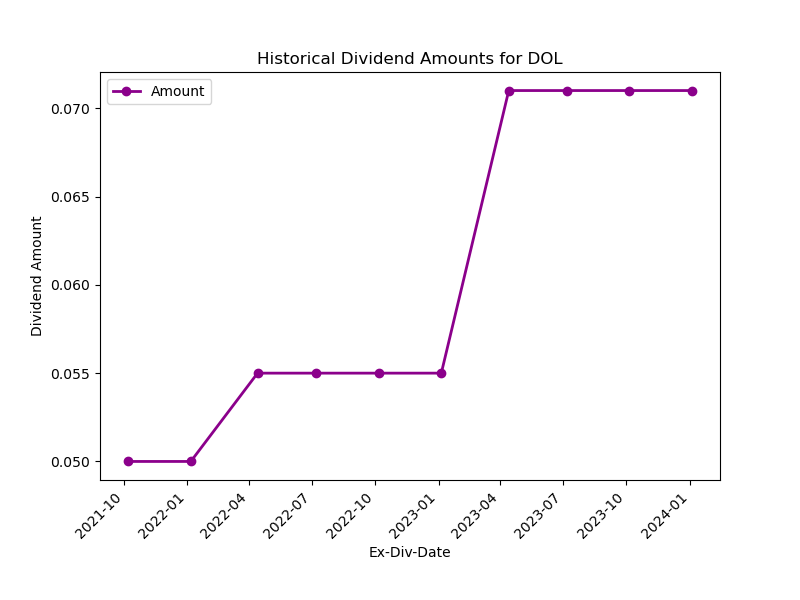

In [51]:
# Historical DOL dividend chart
# Convert 'Amount' column to numeric
DOL_dividend_df['Amount'] = pd.to_numeric(DOL_dividend_df['Amount'], errors='coerce')

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(8, 6))

DOL_dividend_df.plot(kind='line', y='Amount', ax=ax, marker='o', color='darkmagenta', linewidth=2)

# Set labels and title
ax.set_xlabel('Ex-Div-Date')
ax.set_ylabel('Dividend Amount')
ax.set_title('Historical Dividend Amounts for DOL')

# Rotate x-axis labels to be at a 45-degree angle for better visibility
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


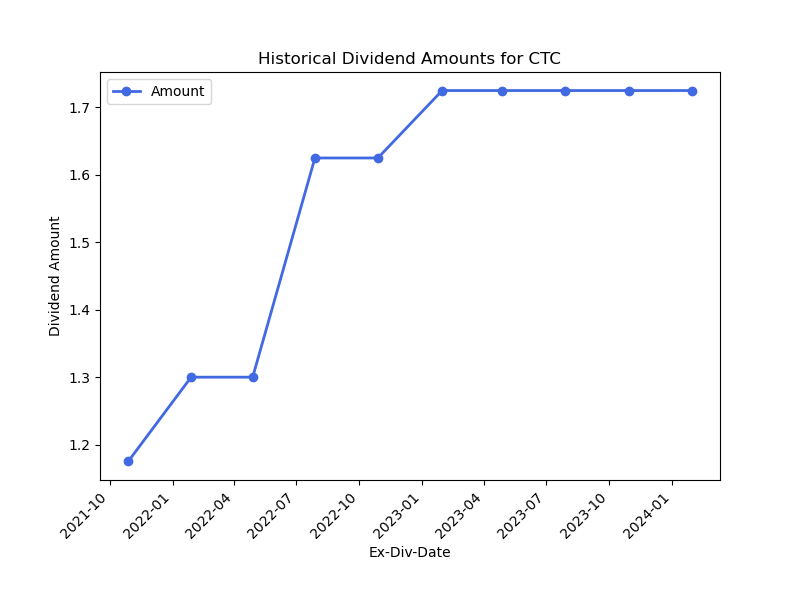

In [52]:
# Historical CTC dividend chart
# Convert 'Amount' column to numeric
CTC_dividend_df['Amount'] = pd.to_numeric(CTC_dividend_df['Amount'], errors='coerce')

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(8, 6))

CTC_dividend_df.plot(kind='line', y='Amount', ax=ax, marker='o', color='royalblue', linewidth=2)

# Set labels and title
ax.set_xlabel('Ex-Div-Date')
ax.set_ylabel('Dividend Amount')
ax.set_title('Historical Dividend Amounts for CTC')

# Rotate x-axis labels to be at a 45-degree angle for better visibility
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


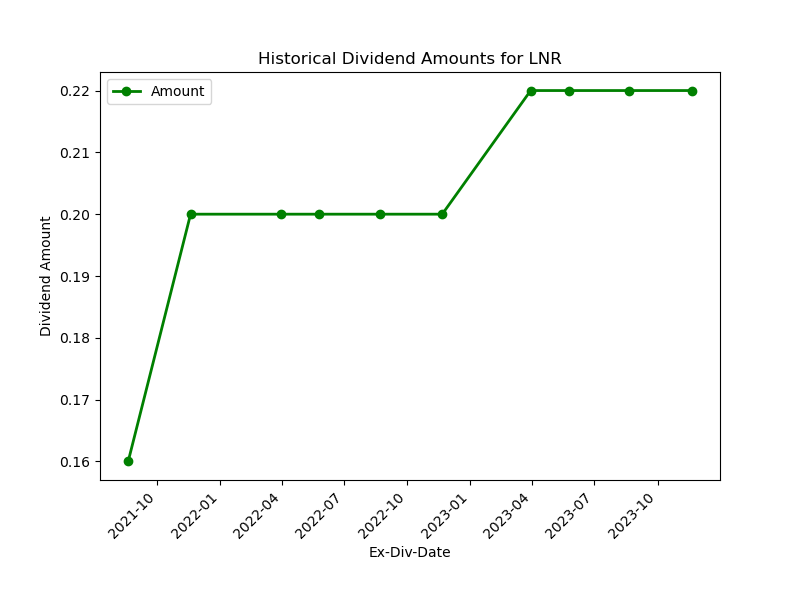

In [53]:
# Historical LNR dividend chart
# Convert 'Amount' column to numeric
LNR_dividend_df['Amount'] = pd.to_numeric(LNR_dividend_df['Amount'], errors='coerce')

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(8, 6))

LNR_dividend_df.plot(kind='line', y='Amount', ax=ax, marker='o', color='green', linewidth=2)

# Set labels and title
ax.set_xlabel('Ex-Div-Date')
ax.set_ylabel('Dividend Amount')
ax.set_title('Historical Dividend Amounts for LNR')

# Rotate x-axis labels to be at a 45-degree angle for better visibility
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


The difference between the closing price on 02-02-2024 and the average target price is: % 4.18


<IPython.core.display.Javascript object>


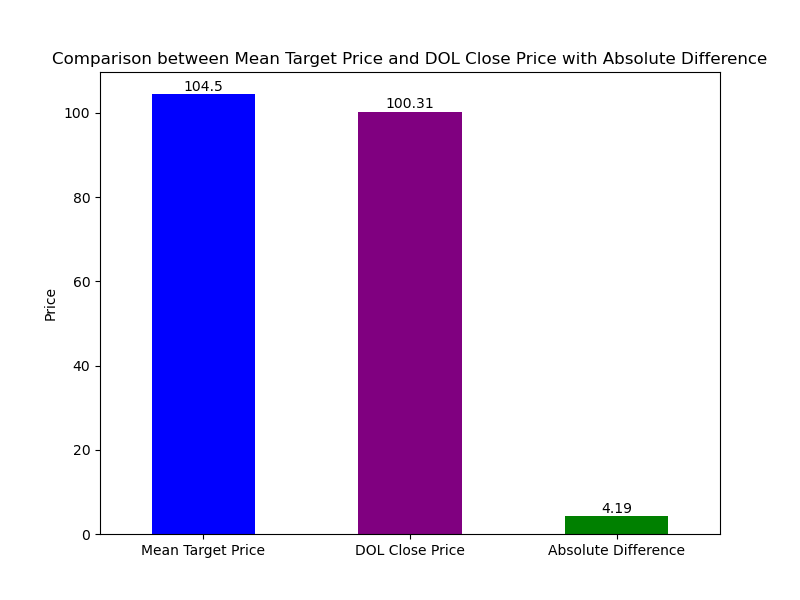

In [54]:
# Comparison between Mean Target Price and DOL Close Price with Absolute Difference

mean_target_price = float(DOL_target_price_table_df.loc['Mean Target Price', 'Value'])
close_price = DOL_close_price_df['DOL Close Price'].values[0]

# Calculate absolute difference and percentage difference
absolute_difference =   mean_target_price - close_price
percentage_difference = (( mean_target_price - close_price) / close_price) * 100
rounded_percentage_difference = round(percentage_difference, 2)

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Price': [mean_target_price, close_price, absolute_difference]
}, index=['Mean Target Price', 'DOL Close Price', 'Absolute Difference'])

# Print the difference statement
print(f'The difference between the closing price on 02-02-2024 and the average target price is: % {rounded_percentage_difference}')

# Plot the vertical bar chart with adjusted figure size and x-axis rotation
fig, ax = plt.subplots(figsize=(8, 6))
comparison_df['Price'].plot(kind='bar', ax=ax, color=['blue', 'purple', 'green'])
ax.set_ylabel('Price')
ax.set_title('Comparison between Mean Target Price and DOL Close Price with Absolute Difference')

# Annotate the bars with values horizontally
for i, v in enumerate(comparison_df['Price']):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', color='black')

# Adjust the rotation angle of x-axis labels to be horizontal
ax.tick_params(axis='x', rotation=0)

# Display the plot
plt.show()


The difference between the closing price on 02-02-2024 and the average target price is: % -30.29


<IPython.core.display.Javascript object>


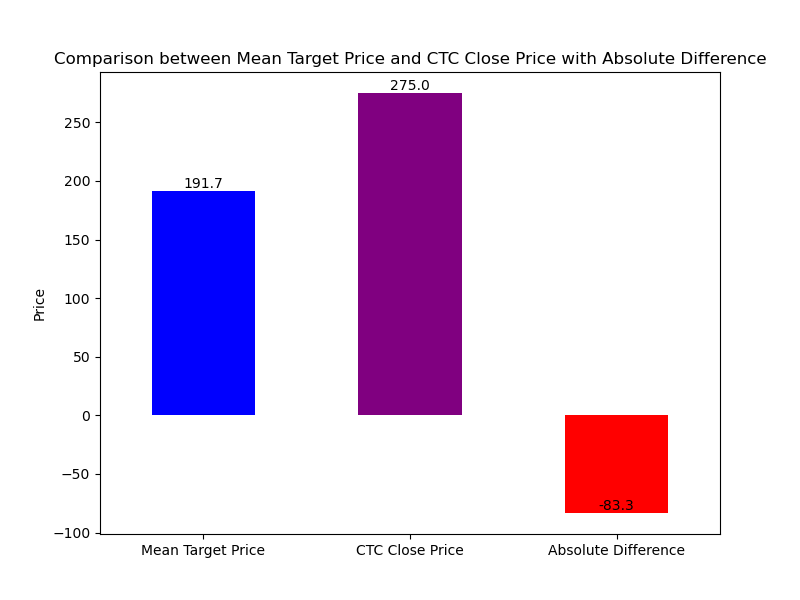

In [55]:
# Comparison between Mean Target Price and CTC Close Price with Absolute Difference

mean_target_price = float(CTC_target_price_table_df.loc['Mean Target Price', 'Value'])
close_price = CTC_close_price_df['CTC Close Price'].values[0]

# Calculate absolute difference and percentage difference
absolute_difference =   mean_target_price - close_price
percentage_difference = (( mean_target_price - close_price) / close_price) * 100
rounded_percentage_difference = round(percentage_difference, 2)

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Price': [mean_target_price, close_price, absolute_difference]
}, index=['Mean Target Price', 'CTC Close Price', 'Absolute Difference'])

# Print the difference statement
print(f'The difference between the closing price on 02-02-2024 and the average target price is: % {rounded_percentage_difference}')

# Plot the vertical bar chart with adjusted figure size and x-axis rotation
fig, ax = plt.subplots(figsize=(8, 6))
comparison_df['Price'].plot(kind='bar', ax=ax, color=['blue', 'purple', 'red'])
ax.set_ylabel('Price')
ax.set_title('Comparison between Mean Target Price and CTC Close Price with Absolute Difference')

# Annotate the bars with values horizontally
for i, v in enumerate(comparison_df['Price']):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', color='black')

# Adjust the rotation angle of x-axis labels to be horizontal
ax.tick_params(axis='x', rotation=0)

# Display the plot
plt.show()


The difference between the closing price on 02-02-2024 and the average target price is: % 26.67


<IPython.core.display.Javascript object>


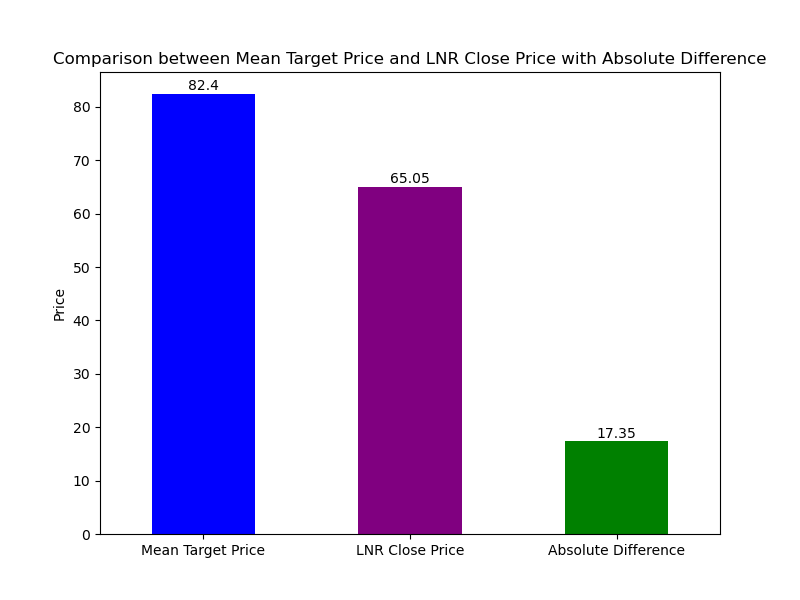

In [56]:
# Comparison between Mean Target Price and LNR Close Price with Absolute Difference

mean_target_price = float(LNR_target_price_table_df.loc['Mean Target Price', 'Value'])
close_price = LNR_close_price_df['LNR Close Price'].values[0]

# Calculate absolute difference and percentage difference
absolute_difference =   mean_target_price - close_price
percentage_difference = (( mean_target_price - close_price) / close_price) * 100
rounded_percentage_difference = round(percentage_difference, 2)

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Price': [mean_target_price, close_price, absolute_difference]
}, index=['Mean Target Price', 'LNR Close Price', 'Absolute Difference'])

# Print the difference statement
print(f'The difference between the closing price on 02-02-2024 and the average target price is: % {rounded_percentage_difference}')

# Plot the vertical bar chart with adjusted figure size and x-axis rotation
fig, ax = plt.subplots(figsize=(8, 6))
comparison_df['Price'].plot(kind='bar', ax=ax, color=['blue', 'purple', 'green'])
ax.set_ylabel('Price')
ax.set_title('Comparison between Mean Target Price and LNR Close Price with Absolute Difference')

# Annotate the bars with values horizontally
for i, v in enumerate(comparison_df['Price']):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', color='black')

# Adjust the rotation angle of x-axis labels to be horizontal
ax.tick_params(axis='x', rotation=0)

# Display the plot
plt.show()